In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re
import plotly.express as px

In [50]:
# load the dataset
df = pd.read_csv(r'C:\Users\godwi\Data_Science_ML\Exploratory_Analysis_Pandas\Super_market_products\supermarket\Message Group - Product.csv')


In [51]:
# Examine the dataset
df.head(2)

,S.No,BrandName,Product ID,Product Name,Brand Desc,Product Size,Currancy,MRP,SellPrice,Discount,Category
0,1,4711,FR001,Cologne Fragrance,ekw eau de cologne 400 ml,Small,Rs.,3900,3120,20% off,Fragrance-Women
1,2,109f,DRW1,DRW1 - Westernwear-Women,womens v- neck short dress - yellow,"Size:Medium,Small,X-Large,XX-Large",Rs.,1899,569,70% off,Westernwear-Women


In [52]:
# rename currancy to currency
df.rename({'Currancy':'Currency'},axis=1 , inplace=True)


In [53]:
df.head(1)

,S.No,BrandName,Product ID,Product Name,Brand Desc,Product Size,Currency,MRP,SellPrice,Discount,Category
0,1,4711,FR001,Cologne Fragrance,ekw eau de cologne 400 ml,Small,Rs.,3900,3120,20% off,Fragrance-Women


In [54]:
df.shape

(4566, 11)

In [55]:

# check the number of unique values in each columns 
df.nunique()

S.No            4566
BrandName         57
Product ID      4566
Product Name    4566
Brand Desc      4146
Product Size     412
Currency           1
MRP              291
SellPrice        651
Discount          37
Category           7
dtype: int64

In [56]:
#check if nan
df.isna().any()

S.No            False
BrandName       False
Product ID      False
Product Name    False
Brand Desc      False
Product Size    False
Currency        False
MRP              True
SellPrice       False
Discount        False
Category        False
dtype: bool

In [57]:
# fill nan
df.fillna(0, axis=1, inplace=True)

In [58]:
df.columns.value_counts()

S.No            1
BrandName       1
Product ID      1
Product Name    1
Brand Desc      1
Product Size    1
Currency        1
MRP             1
SellPrice       1
Discount        1
Category        1
Name: count, dtype: int64

In [59]:
df.dtypes

S.No            object
BrandName       object
Product ID      object
Product Name    object
Brand Desc      object
Product Size    object
Currency        object
MRP             object
SellPrice       object
Discount        object
Category        object
dtype: object

In [116]:
df.SellPrice = pd.to_numeric(df.SellPrice,errors='coerce')
df.MRP = pd.to_numeric(df.MRP,errors='coerce')

In [117]:
df.Category.value_counts().index

Index(['Westernwear-Women', 'Indianwear-Women', 'Footwear-Women',
       'Jewellery-Women', 'Lingerie&Nightwear-Women', 'Watches-Women',
       'Fragrance-Women'],
      dtype='object', name='Category')

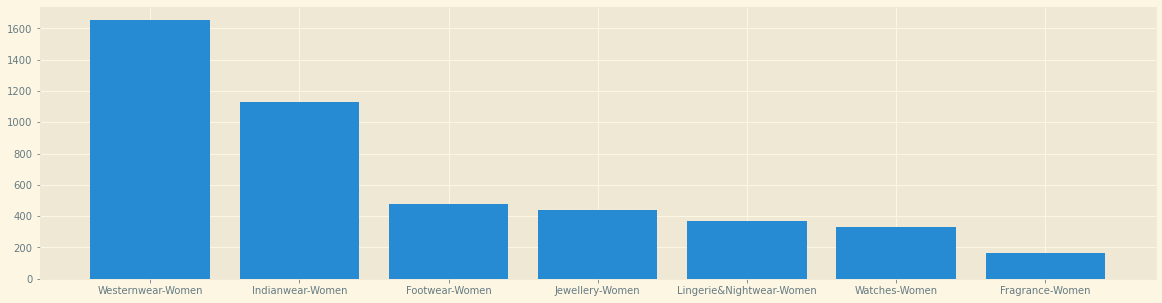

In [118]:
# visualize the categories
fig, ax=plt.subplots(figsize =(20,5))
plt.bar(df.Category.value_counts().index,df.Category.value_counts().values )
plt.show()

c:\Users\godwi\anaconda3\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\Users\godwi\anaconda3\envs\ML\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\godwi\anaconda3\envs\ML\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\godwi\anaconda3\envs\ML\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



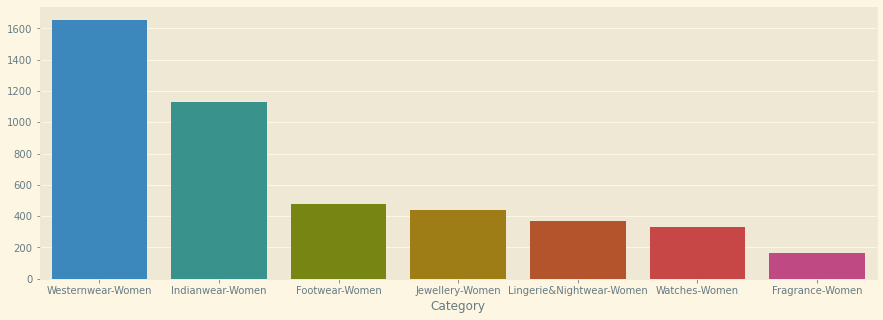

In [119]:
fig, ax=plt.subplots (figsize = (15,5))
sns.barplot(df.Category.value_counts().index,df.Category.value_counts().values )
plt.show();

In [120]:
df.Category.value_counts()

Category
Westernwear-Women           1654
Indianwear-Women            1131
Footwear-Women               480
Jewellery-Women              438
Lingerie&Nightwear-Women     367
Watches-Women                329
Fragrance-Women              167
Name: count, dtype: int64

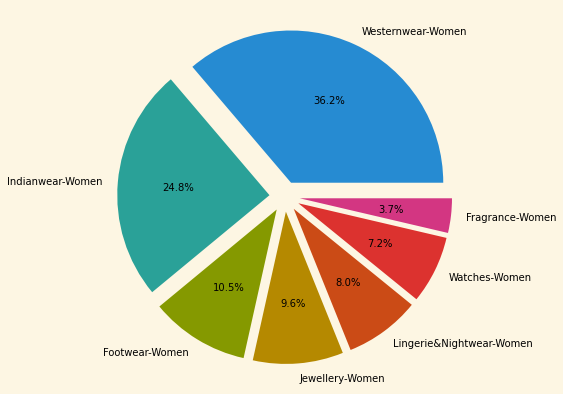

In [121]:
explode= [0.1,0.1,0.1,0.1,0.1, 0.1,0.1]
plt.style.use("Solarize_Light2")
fig, ax= plt.subplots(figsize = (7,7))
plt.pie(df.Category.value_counts(),autopct= '%.1f%%', labels=df.Category.value_counts().index,explode= explode)
plt.show();

In [122]:
df_plot = df.Category.value_counts().to_frame()
df_plot

,count
Category,
Westernwear-Women,1654
Indianwear-Women,1131
Footwear-Women,480
Jewellery-Women,438
Lingerie&Nightwear-Women,367
Watches-Women,329
Fragrance-Women,167


In [123]:
#using Plotly 
fig=px.pie(df_plot, values = 'count', names = df_plot.index)
fig.update_layout(width = 700)
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

In [124]:
# category by selling price
df.loc[:,['Category','SellPrice']].groupby('Category').sum()

,SellPrice
Category,
Footwear-Women,1240072
Fragrance-Women,511773
Indianwear-Women,2097574
Jewellery-Women,254755
Lingerie&Nightwear-Women,238255
Watches-Women,2425092
Westernwear-Women,2388326


c:\Users\godwi\anaconda3\envs\ML\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\godwi\anaconda3\envs\ML\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\godwi\anaconda3\envs\ML\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



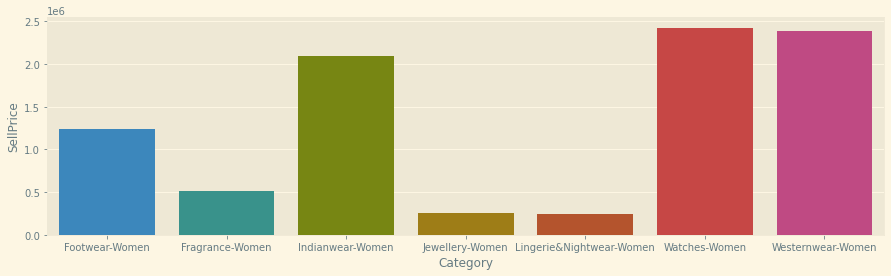

In [125]:
# Visualize the category vs selling price
fig, ax=plt.subplots(figsize =(15,4))
sns.barplot(data = df.loc[:,['Category','SellPrice']].groupby('Category').sum(),x =df.loc[:,['Category','SellPrice']].groupby('Category').sum().index,\
    y = df.loc[:,['Category','SellPrice']].groupby('Category').sum().SellPrice)
plt.show()

In [126]:
# Convert MRP from object to int for numerical analysis/ calculation
df['MRP'] = pd.to_numeric(df['MRP'],'coerce')

In [127]:
df.head(2)

,S.No,BrandName,Product ID,Product Name,Brand Desc,Product Size,Currency,MRP,SellPrice,Discount,Category,delta
0,1,4711,FR001,Cologne Fragrance,ekw eau de cologne 400 ml,Small,Rs.,3900.0,3120,20% off,Fragrance-Women,780.0
1,2,109f,DRW1,DRW1 - Westernwear-Women,womens v- neck short dress - yellow,"Size:Medium,Small,X-Large,XX-Large",Rs.,1899.0,569,70% off,Westernwear-Women,1330.0


In [128]:
df.to_csv('supermarket.csv')

In [129]:
# visualize category, selling price and MRP
mrp_sell_delta = df.loc[:,['Category','MRP','SellPrice']]
mrp_sell_delta = mrp_sell_delta.groupby('Category').sum().reset_index().set_index('Category')


In [130]:
mrp_sell_delta['SellPrice'] = pd.to_numeric(mrp_sell_delta.SellPrice)

In [131]:
fig =px.bar(mrp_sell_delta,barmode='group' )
fig.update_layout(width = 900)
fig.show()

In [132]:
# lets find the delta / difference between the total 
mrp_sell_delta = df.loc[:,['Category','MRP','SellPrice']]
mrp_sell_delta

,Category,MRP,SellPrice
0,Fragrance-Women,3900.0,3120
1,Westernwear-Women,1899.0,569
2,Westernwear-Women,1499.0,599
3,Westernwear-Women,1599.0,639
4,Westernwear-Women,1199.0,479
...,...,...,...
4561,Westernwear-Women,1699.0,849
4562,Westernwear-Women,1299.0,1039
4563,Westernwear-Women,1299.0,649
4564,Westernwear-Women,1399.0,979


In [133]:

# create another column for the delta
df['delta'] = df['MRP']- df['SellPrice']

In [134]:
df.head(2)

,S.No,BrandName,Product ID,Product Name,Brand Desc,Product Size,Currency,MRP,SellPrice,Discount,Category,delta
0,1,4711,FR001,Cologne Fragrance,ekw eau de cologne 400 ml,Small,Rs.,3900.0,3120,20% off,Fragrance-Women,780.0
1,2,109f,DRW1,DRW1 - Westernwear-Women,womens v- neck short dress - yellow,"Size:Medium,Small,X-Large,XX-Large",Rs.,1899.0,569,70% off,Westernwear-Women,1330.0


In [135]:

# Merge dataframes
rp_sell_delta= pd.merge(mrp_sell_delta,df['delta'], left_index=True, right_index=True)
rp_sell_delta

,Category,MRP,SellPrice,delta
0,Fragrance-Women,3900.0,3120,780.0
1,Westernwear-Women,1899.0,569,1330.0
2,Westernwear-Women,1499.0,599,900.0
3,Westernwear-Women,1599.0,639,960.0
4,Westernwear-Women,1199.0,479,720.0
...,...,...,...,...
4561,Westernwear-Women,1699.0,849,850.0
4562,Westernwear-Women,1299.0,1039,260.0
4563,Westernwear-Women,1299.0,649,650.0
4564,Westernwear-Women,1399.0,979,420.0


In [136]:
rp_sell_delta.groupby('Category').sum()

,MRP,SellPrice,delta
Category,,,
Footwear-Women,978618.1,1240072,-261453.9
Fragrance-Women,199944.5,511773,-311828.5
Indianwear-Women,1500765.8,2097574,-581208.2
Jewellery-Women,309587.7,254755,54832.7
Lingerie&Nightwear-Women,275767.5,238255,37512.5
Watches-Women,2094103.0,2425092,-330989.0
Westernwear-Women,2931698.2,2388326,543372.2


In [137]:
rp_sell_delta= rp_sell_delta.groupby('Category').sum()
rp_sell_delta

,MRP,SellPrice,delta
Category,,,
Footwear-Women,978618.1,1240072,-261453.9
Fragrance-Women,199944.5,511773,-311828.5
Indianwear-Women,1500765.8,2097574,-581208.2
Jewellery-Women,309587.7,254755,54832.7
Lingerie&Nightwear-Women,275767.5,238255,37512.5
Watches-Women,2094103.0,2425092,-330989.0
Westernwear-Women,2931698.2,2388326,543372.2


In [138]:
df.Discount[10].split(' ',)

['60%', 'off']

In [139]:
dis = df.Discount.replace('%','',regex=True).replace('off','',regex = True).astype(int)
dis = dis.to_frame()
dis


,Discount
0,20
1,70
2,60
3,60
4,60
...,...
4561,50
4562,20
4563,50
4564,30


In [140]:
# Finally check stats
pd.merge(df,dis,left_index=True, right_index=True).describe()

,MRP,SellPrice,delta,Discount_y
count,4561.000000,4566.000000,4561.000000,4566.000000
mean,1817.690156,2005.222733,-186.310502,29.991897
std,2280.088780,2259.614915,2409.767177,17.856129
min,0.000000,89.000000,-25900.500000,5.000000
25%,8.900000,749.000000,-594.500000,10.000000
50%,1490.000000,1379.000000,420.000000,30.000000
75%,2499.000000,2299.000000,859.000000,50.000000
max,28495.000000,25995.000000,11498.000000,80.000000


In [141]:
pd.merge(df,dis,left_index=True, right_index=True).loc[:,['Category','Discount_y']]\
    .groupby('Category').mean()

,Discount_y
Category,
Footwear-Women,28.718750
Fragrance-Women,15.179641
Indianwear-Women,25.026525
Jewellery-Women,40.171233
Lingerie&Nightwear-Women,36.321526
Watches-Women,21.185410
Westernwear-Women,32.903869


In [142]:
fig=px.bar(pd.merge(df,dis,left_index=True, right_index=True).loc[:,['Category','Discount_y']]\
    .groupby('Category').mean())
fig.update_layout(width = 700)
fig.show();

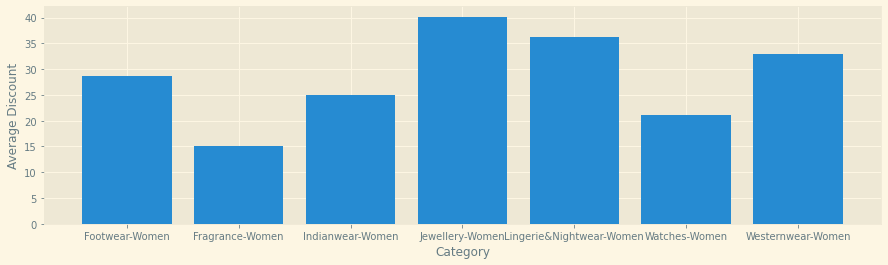

In [143]:
fig, ax= plt.subplots(figsize =(15,4))
plt.bar(pd.merge(df,dis,left_index=True, right_index=True).loc[:,['Category','Discount_y']]\
    .groupby('Category').mean().index,\
        pd.merge(df,dis,left_index=True, right_index=True).loc[:,['Category','Discount_y']]\
    .groupby('Category').mean().Discount_y)
plt.ylabel("Average Discount")
plt.xlabel("Category")
plt.show();